In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

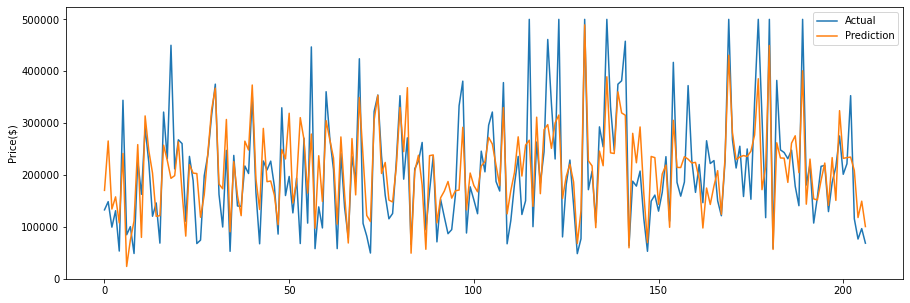

In [2]:
# 회귀 모델은 이전에 사용한 linear regression(다중 선형 회귀 모델) 사용

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = fetch_california_housing()
cal_house_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
cal_house_df['Price($)'] = dataset.target * 100000

X = cal_house_df.drop('Price($)', axis = 1)
y = cal_house_df['Price($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, shuffle = True)

# 다중 선형 회귀 모델
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

predictions = mlr_model.predict(X_test)

y_test = y_test.reset_index(drop = True)

plt.figure(figsize = (15, 5))
plt.plot(y_test, label = 'Actual')
plt.plot(predictions, label = 'Prediction')
plt.legend(loc = 'upper right')
plt.ylabel('Price($)')
plt.show()

# MAE(mean absolute error)

- 실제값과 예측값의 차이의 전체 평균
- 낮을수록 좋은 지표
- 절대값으로 나타내기 때문에 가장 직관적으로 오차를 알 수 있음

In [3]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
mae

50626.64341816183

- 실제값과 50626 정도의 오차를 보임

# MSE(mean squared error) / RMSE(root mean squared error)

- mse = 실제값과 예측값의 차이를 제곱. = 차이의 면적합. 따라서 너무 못 맞춘 예측값이 많을수록 기하급수적으로 오차가 커짐
- rmse = mse에 root를 씌운 지표. mse보다 좀 더 직관적으로 확인가능
- 값이 낮을수록 좋음

In [4]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

4502163991.465968

In [5]:
rmse = mse ** 0.5
rmse

67098.1668264191

## R-squared(R^2)

- 회귀선이 실제값에 얼마나 잘 적합되었는가를 나타냄
- 실제값과 실제값 평균까지 거리를 계산한 뒤, 예측값과 비교
- 0 ~ 1 사이의 값. 높을수록 적합이 잘 됨

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.6273397155272621

## Adjusted R-squared

- 회귀 모형의 적합도(R^2)는 학습 변수가 많아질수록 높아지는 경향이 있음 => 과적합 될 수 있음
- adjusted r-squared는 이런 과적합 현상을 판단하기 위한 지표
- 학습에 사용된 변수만큼 패널티를 부과해서 적합도를 수정
- 만약 적합도(R^2)가 높은데, 수정된 적합도가 현저하게 낮다면, 학습 모델이 과적합되었다고 판단

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

In [8]:
# adjusted r-squared

adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
adj_r2

0.6122827343364443

#### 전체 회귀 모델 성능 지표

In [9]:
print('MAE: {}'.format(round(mae, 2)))
print('MSE: {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse, 2)))
print('R2: {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE: 50626.64
MSE: 4502163991.47
RMSE: 67098.17
R2: 0.63
adj_R2: 0.61
